# Testing the Emotion Detector model

In [1]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

In [2]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.15.0'

## Step 2 - Connecting to Drive and accessing files

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
path = "/content/gdrive/My Drive/ImplementingArtificialIntelligenceforEmotionDetection/Sentiment-analysis-international-acceleration-project/01_Base/files.zip"
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/My Drive/ImplementingArtificialIntelligenceforEmotionDetection/Sentiment-analysis-international-acceleration-project/01_Base/files.zip' mode='r'>>

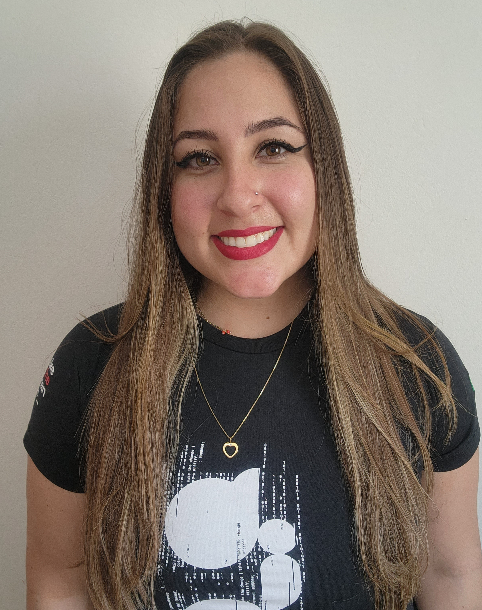

In [9]:
image = cv2.imread('/content/gdrive/My Drive/ImplementingArtificialIntelligenceforEmotionDetection/Sentiment-analysis-international-acceleration-project/01_Base/isa.png')
cv2_imshow(image)

In [10]:
image.shape

(610, 482, 3)

## Testing the Detector

In [15]:
cascade_faces = 'Material/haarcascade_frontalface_default.xml'
model_path = 'Material/modelo_01_expressoes.h5'
face_detection =cv2.CascadeClassifier(cascade_faces)
emotions_classifier = load_model(model_path, compile = False)
expressions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Suprise', 'Neutral']

##Face detection

In [16]:
original = image.copy()
faces = face_detection.detectMultiScale(original, scaleFactor= 1.1, minNeighbors= 3, minSize= (20,20))

In [17]:
faces

array([[136,  76, 208, 208]], dtype=int32)

In [18]:
len(faces)

1

In [19]:
faces.shape

(1, 4)

## Extraction of ROI (region of interest)

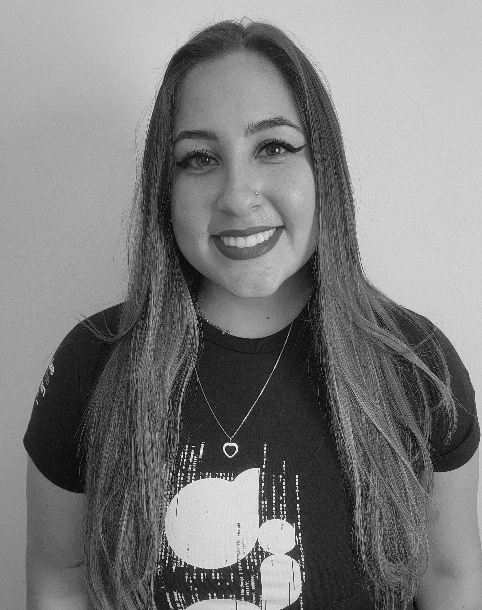

In [21]:
gray =cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [22]:
gray.shape

(610, 482)

In [24]:
roi = gray[40:40 + 230, 162:162 + 140]

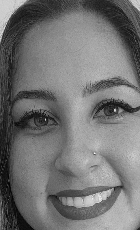

In [25]:
cv2_imshow(roi)

In [26]:
roi.shape

(230, 140)

array([[206, 204, 199, ..., 205, 203, 194],
       [206, 207, 202, ..., 187, 204, 199],
       [207, 208, 199, ..., 183, 196, 209],
       ...,
       [103,  82, 109, ..., 105,  98,  54],
       [102,  83, 129, ...,  96,  38,  37],
       [ 99,  81,  82, ...,  43,  35,  35]], dtype=uint8)
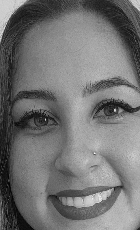

In [27]:
roi

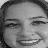

In [28]:
roi = cv2.resize(roi, (48,48))
cv2_imshow(roi)

In [29]:
roi.dtype

dtype('uint8')

In [30]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [31]:
roi

array([[208., 204., 207., ..., 208., 201., 197.],
       [203., 206., 209., ...,  79., 168., 188.],
       [203., 204., 203., ...,  98.,  75.,  95.],
       ...,
       [ 85.,  49.,  30., ..., 181., 167., 155.],
       [ 85.,  57.,  31., ..., 170., 162., 136.],
       [ 83.,  78.,  69., ..., 159., 128.,  90.]])

In [38]:
roi = roi/255 # normalization

In [39]:
roi

array([[[[0.8156863 ],
         [0.8       ],
         [0.8117647 ],
         ...,
         [0.8156863 ],
         [0.7882353 ],
         [0.77254903]],

        [[0.79607844],
         [0.80784315],
         [0.81960785],
         ...,
         [0.30980393],
         [0.65882355],
         [0.7372549 ]],

        [[0.79607844],
         [0.8       ],
         [0.79607844],
         ...,
         [0.38431373],
         [0.29411766],
         [0.37254903]],

        ...,

        [[0.33333334],
         [0.19215687],
         [0.11764706],
         ...,
         [0.70980394],
         [0.654902  ],
         [0.60784316]],

        [[0.33333334],
         [0.22352941],
         [0.12156863],
         ...,
         [0.6666667 ],
         [0.63529414],
         [0.53333336]],

        [[0.3254902 ],
         [0.30588236],
         [0.27058825],
         ...,
         [0.62352943],
         [0.5019608 ],
         [0.3529412 ]]]], dtype=float32)

In [32]:
roi = img_to_array(roi)

In [33]:
roi

array([[[208.],
        [204.],
        [207.],
        ...,
        [208.],
        [201.],
        [197.]],

       [[203.],
        [206.],
        [209.],
        ...,
        [ 79.],
        [168.],
        [188.]],

       [[203.],
        [204.],
        [203.],
        ...,
        [ 98.],
        [ 75.],
        [ 95.]],

       ...,

       [[ 85.],
        [ 49.],
        [ 30.],
        ...,
        [181.],
        [167.],
        [155.]],

       [[ 85.],
        [ 57.],
        [ 31.],
        ...,
        [170.],
        [162.],
        [136.]],

       [[ 83.],
        [ 78.],
        [ 69.],
        ...,
        [159.],
        [128.],
        [ 90.]]], dtype=float32)

In [34]:
roi.shape

(48, 48, 1)

In [35]:
roi = np.expand_dims(roi, axis =0)

In [36]:
roi.shape

(1, 48, 48, 1)

### Predictions

In [40]:
preds = emotions_classifier.predict(roi)[0]

1/1 [==============================] - 0s 44ms/step


In [41]:
preds

array([6.4363673e-13, 2.1368869e-22, 5.1944872e-12, 1.0000000e+00,
       4.0683497e-13, 4.0267256e-12, 2.2693219e-11], dtype=float32)

In [43]:
len(preds)

7

In [46]:
emotion_probability = np.max(preds)
emotion_probability

1.0

In [47]:
preds.argmax()

3

In [48]:
label = expressions[preds.argmax()]
label

'Happy'

### Results

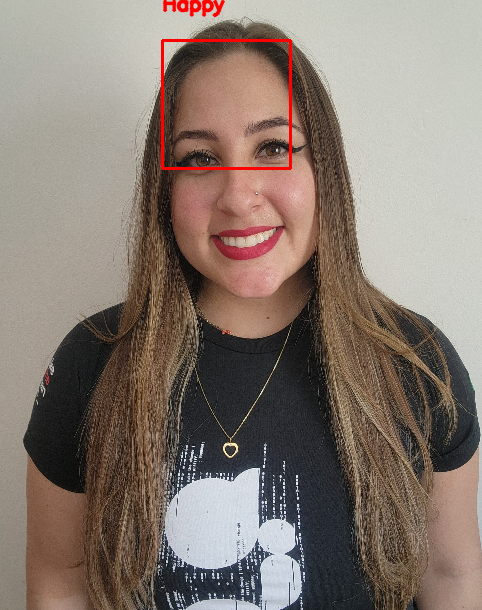

In [49]:
cv2.putText(original, label, (162, 40 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.65,(0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255),2)
cv2_imshow(original)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
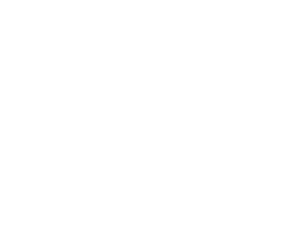

In [51]:
probability = np.ones((250, 300, 3), dtype ='uint8')* 255
probability

In [52]:
probability.shape

(250, 300, 3)

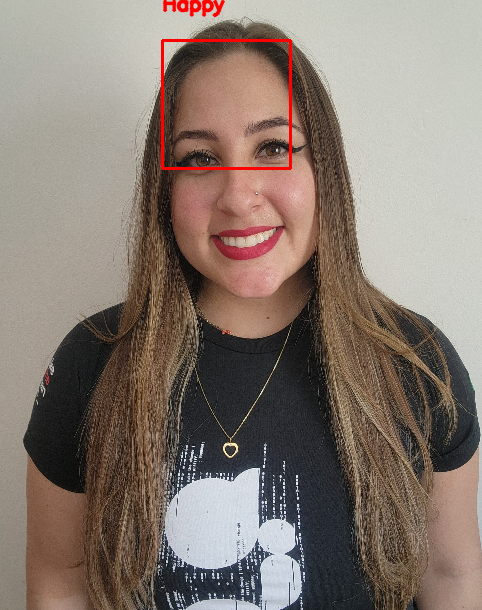

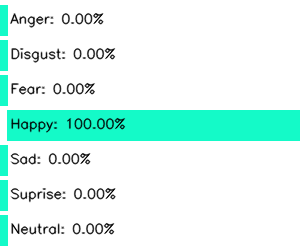

In [54]:
cv2_imshow(original)
if len(faces) ==1:
  for(i, (emotion, prob)) in enumerate(zip(expressions, preds)):
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probability, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1 )
    cv2.putText(probability, text, (10, (i* 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(probability)